<a href="https://colab.research.google.com/github/suffenjoy/Corn_Soy_Yield_Prediction_S2/blob/main/Corn_Soy_Yield_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [215]:
import pandas as pd
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
from datetime import datetime

In [216]:
!pip install geopandas

In [217]:
import geopandas as gpd

In [218]:
Years = ['2019','2020']
Crops = ['corn','soy']

In [226]:
path_yield = '/content/gdrive/MyDrive/PAii_YieldForecast/Yield/'
path_cfsv2 = '/content/gdrive/MyDrive/PAii_YieldForecast/CFSV2/'
path_soil = '/content/gdrive/MyDrive/PAii_YieldForecast/SoilGrids250/'
path_s2 = '/content/gdrive/MyDrive/PAii_YieldForecast/Sentinel2/'
path_summary = '/content/gdrive/MyDrive/PAii_YieldForecast/Summary/'

# Yield and Historical Yield

In [ ]:
#read data 
all_corn = gpd.read_file(path_yield+'all_corn.shp')
all_soy = gpd.read_file(path_yield+'all_soybeans.shp') 

In [ ]:
all_corn.head()

,Unnamed_ 0,STATEFP,ANSI,NAME,1910,1911,1912,1913,1914,1915,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,geometry
0,0,21,21007,Ballard,NaN,NaN,NaN,NaN,NaN,NaN,...,49.4,159.5,NaN,177.9,153.7,179.1,NaN,NaN,174.0,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,1,21,21017,Bourbon,NaN,NaN,NaN,NaN,NaN,NaN,...,34.7,170.1,168.8,171.7,162.7,142.7,196.8,NaN,135.6,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,2,21,21031,Butler,NaN,NaN,NaN,NaN,NaN,NaN,...,105.3,172.5,170.4,159.5,134.4,186.9,194.0,NaN,174.5,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,3,21,21065,Estill,NaN,NaN,NaN,NaN,NaN,NaN,...,102.1,145.6,145.5,141.2,133.4,NaN,NaN,122.0,151.9,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,4,21,21069,Fleming,NaN,NaN,NaN,NaN,NaN,NaN,...,75.1,146.0,NaN,137.5,148.2,150.5,167.0,135.0,136.1,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


## Subset to 2019 and 2020 Yield

In [ ]:
# 2019 and 2020 yield

   STATEFP   ANSI     NAME  Yield  \
3       21  21065   Estill  122.0   
4       21  21069  Fleming  135.0   
5       21  21093   Hardin  139.0   
8       21  21151  Madison  140.0   
9       21  21155   Marion  153.0   

                                            geometry  Year  
3  POLYGON ((-84.12662 37.64540, -84.12483 37.646...  2019  
4  POLYGON ((-83.98428 38.44549, -83.98246 38.450...  2019  
5  POLYGON ((-86.27756 37.58881, -86.27420 37.589...  2019  
8  POLYGON ((-84.52564 37.76950, -84.52350 37.771...  2019  
9  POLYGON ((-85.52129 37.55434, -85.50452 37.584...  2019  
(1257, 6)
   STATEFP   ANSI     NAME  Yield  \
0       21  21007  Ballard  174.0   
1       21  21017  Bourbon  135.6   
2       21  21031   Butler  174.5   
3       21  21065   Estill  151.9   
4       21  21069  Fleming  136.1   

                                            geometry  Year  
0  POLYGON ((-89.18137 37.04630, -89.17938 37.053...  2020  
1  POLYGON ((-84.44266 38.28324, -84.44114 38.283...  20

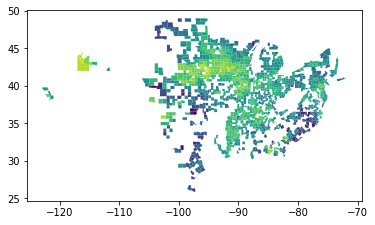

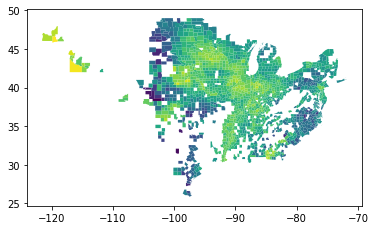

In [ ]:
#corn 
for year in Years:
  #subset
  corn_year = all_corn[['STATEFP','ANSI','NAME',year,'geometry']]
  #drop NAs
  corn_year = corn_year.dropna(axis = 0)
  #rename the columns
  corn_year = corn_year.rename(columns = {year: "Yield"})
  corn_year['Year'] = year
  print(corn_year.head())
  print(corn_year.shape)
  #output to a new shp
  corn_year.to_file(path_yield + 'Processed/' + 'corn_' + year + '.shp')
  #plot
  corn_year.plot(column = 'Yield')

   STATEFP   ANSI     NAME  Yield  \
0       21  21007  Ballard   51.5   
2       21  21031   Butler   51.0   
3       21  21065   Estill   35.0   
4       21  21069  Fleming   40.5   
5       21  21093   Hardin   36.5   

                                            geometry  Year  
0  POLYGON ((-89.18137 37.04630, -89.17938 37.053...  2019  
2  POLYGON ((-86.94486 37.07341, -86.94346 37.074...  2019  
3  POLYGON ((-84.12662 37.64540, -84.12483 37.646...  2019  
4  POLYGON ((-83.98428 38.44549, -83.98246 38.450...  2019  
5  POLYGON ((-86.27756 37.58881, -86.27420 37.589...  2019  
(1098, 6)
   STATEFP   ANSI     NAME  Yield  \
0       21  21007  Ballard   56.9   
1       21  21017  Bourbon   50.4   
2       21  21031   Butler   54.0   
3       21  21065   Estill   50.3   
4       21  21069  Fleming   48.5   

                                            geometry  Year  
0  POLYGON ((-89.18137 37.04630, -89.17938 37.053...  2020  
1  POLYGON ((-84.44266 38.28324, -84.44114 38.283...  20

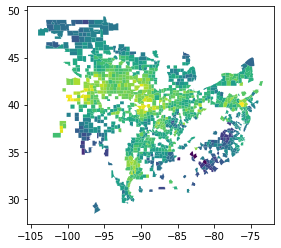

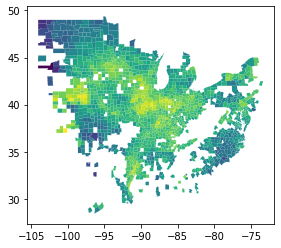

In [ ]:
#soy 
for year in Years:
  #subset
  soy_year = all_soy[['STATEFP','ANSI','NAME',year,'geometry']]
  #drop NAs
  soy_year = soy_year.dropna(axis = 0)
  #rename the columns
  soy_year = soy_year.rename(columns = {year: "Yield"})
  soy_year['Year'] = year
  print(soy_year.head())
  print(soy_year.shape)
  #output to a new shp
  soy_year.to_file(path_yield + 'Processed/' + 'soy_' + year + '.shp')
  #plot
  soy_year.plot(column = 'Yield')

## Calculate Historical Yield

In [ ]:
all_corn.head()

,Unnamed_ 0,STATEFP,ANSI,NAME,1910,1911,1912,1913,1914,1915,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,geometry
0,0,21,21007,Ballard,NaN,NaN,NaN,NaN,NaN,NaN,...,49.4,159.5,NaN,177.9,153.7,179.1,NaN,NaN,174.0,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,1,21,21017,Bourbon,NaN,NaN,NaN,NaN,NaN,NaN,...,34.7,170.1,168.8,171.7,162.7,142.7,196.8,NaN,135.6,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,2,21,21031,Butler,NaN,NaN,NaN,NaN,NaN,NaN,...,105.3,172.5,170.4,159.5,134.4,186.9,194.0,NaN,174.5,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,3,21,21065,Estill,NaN,NaN,NaN,NaN,NaN,NaN,...,102.1,145.6,145.5,141.2,133.4,NaN,NaN,122.0,151.9,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,4,21,21069,Fleming,NaN,NaN,NaN,NaN,NaN,NaN,...,75.1,146.0,NaN,137.5,148.2,150.5,167.0,135.0,136.1,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


In [ ]:
#corn
for year in Years:
  year_range5 = list(range(int(year) - 5, int(year)))
  year_range5 = list(map(str, year_range5))
  #print(year_range5)
  #print(list(['STTEFP','ANSI','NAME']+year_range5))
  #subset
  corn_hist = all_corn[['STATEFP','ANSI','NAME'] + year_range5]
  #calculate mean 
  corn_hist['Yield_Hist'] = corn_hist[year_range5].mean(axis = 1)
  #drop yearly record
  corn_hist.drop(columns  = year_range5, inplace = True)
  print(corn_hist.head())
  #output to csv
  corn_hist.to_csv(path_yield + 'Processed/' + 'corn_hist_' + year + '.csv')


   STATEFP   ANSI     NAME  Yield_Hist
0       21  21007  Ballard  170.233333
1       21  21017  Bourbon  168.540000
2       21  21031   Butler  169.040000
3       21  21065   Estill  140.033333
4       21  21069  Fleming  150.800000
   STATEFP   ANSI     NAME  Yield_Hist
0       21  21007  Ballard  170.233333
1       21  21017  Bourbon  168.475000
2       21  21031   Butler  168.700000
3       21  21065   Estill  132.200000
4       21  21069  Fleming  147.640000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [ ]:
#soy
for year in Years:
  year_range5 = list(range(int(year) - 5, int(year)))
  year_range5 = list(map(str, year_range5))
  #print(year_range5)
  #print(list(['STTEFP','ANSI','NAME']+year_range5))
  #subset
  soy_hist = all_soy[['STATEFP','ANSI','NAME'] + year_range5]
  #calculate mean 
  soy_hist['Yield_Hist'] = soy_hist[year_range5].mean(axis = 1)
  #drop yearly record
  soy_hist.drop(columns  = year_range5, inplace = True)
  print(soy_hist.head())
  #output to csv
  soy_hist.to_csv(path_yield + 'Processed/' + 'soy_hist_' + year + '.csv')

   STATEFP   ANSI     NAME  Yield_Hist
0       21  21007  Ballard   49.933333
1       21  21017  Bourbon   49.260000
2       21  21031   Butler   50.300000
3       21  21065   Estill   41.150000
4       21  21069  Fleming   45.150000
   STATEFP   ANSI     NAME  Yield_Hist
0       21  21007  Ballard      50.325
1       21  21017  Bourbon      48.350
2       21  21031   Butler      49.460
3       21  21065   Estill      38.900
4       21  21069  Fleming      43.900


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

# CFSV2 Weather

In [223]:
#read data 
for year in Years:
  df_list = glob.glob(path_cfsv2+'Raw/'+'*'+year+'.csv')
  dfs = list()
  #print(df_list)
  for i in df_list:
    #read data
    df = pd.read_csv(i)
    weather_var = i.split('/')[-1].split('_')[0]
    #clean data
    ##new column names
    df.rename(columns = {'system:index':'DateTime','mean': weather_var}, inplace = True)
    ##create date and time
    df['DateTime'] = df['DateTime'].str.split('_').str[0]
    df['Date'] = df['DateTime'].str[0:8]
    df['Time'] = df['DateTime'].str[8:10]
    df.drop(columns = 'DateTime', inplace = True)
    ##aggregate to each date
    df_agg = df.groupby(['COUNTYFP','COUNTYNS','NAME','STATEFP','Date']).agg('mean').reset_index()
    ##add to the list
    dfs.append(df_agg)
  #combine the data
  df_all = pd.concat(dfs, axis = 1)
  #drop duplicate columns
  df_all = df_all.loc[:,~df_all.columns.duplicated()]
  #Date columns edit 
  df_all['Date'] = pd.to_datetime(df_all['Date'], format = '%Y%m%d')
  #Resample to 15-day period
  df_all_resample = df_all.loc[(df_all['Date']>= pd.to_datetime(year+'-04-16')) & (df_all['Date']<pd.to_datetime(year+'-10-15'))]
  df_all_resample = df_all_resample.set_index('Date').groupby(['COUNTYFP','COUNTYNS','NAME','STATEFP']).resample('15D', origin = pd.to_datetime(year+'-05-01')).agg({'Tmean':'mean','Tmin':'mean','Tmax':'mean','Hmean':'mean','Hmin':'mean','Hmax':'mean','prcp':'mean','srad':'mean'})
  #drop NAs
  print(df_all.isnull().sum())
  #output processed dataframe
  df_all.to_csv(path_cfsv2+'Processed/'+'cfsv2_'+year+'.csv')
  df_all_resample.to_csv(path_cfsv2+'Processed/'+'cfsv2_'+year+'_15D.csv')

COUNTYFP    0
COUNTYNS    0
NAME        0
STATEFP     0
Date        0
Tmean       0
Hmin        0
Hmean       0
Tmin        0
Tmax        0
Hmax        0
prcp        0
srad        0
dtype: int64
COUNTYFP    0
COUNTYNS    0
NAME        0
STATEFP     0
Date        0
Tmean       0
Tmin        0
Hmean       0
Tmax        0
Hmin        0
Hmax        0
prcp        0
srad        0
dtype: int64


In [224]:
df_all.head()

,COUNTYFP,COUNTYNS,NAME,STATEFP,Date,Tmean,Tmin,Hmean,Tmax,Hmin,Hmax,prcp,srad
0,1,63755,Arkansas,5,2020-01-01,279.243758,277.689486,0.004136,280.689501,0.003773,0.004384,0.000000,71.690921
1,1,63755,Arkansas,5,2020-01-02,282.783556,281.976006,0.007026,282.892518,0.006299,0.007066,0.000381,5.494379
2,1,63755,Arkansas,5,2020-01-03,286.457345,285.464865,0.009054,287.324081,0.008640,0.009520,0.000176,24.905623
3,1,63755,Arkansas,5,2020-01-04,279.637524,279.143122,0.004809,282.739887,0.004767,0.006190,0.000002,140.268442
4,1,63755,Arkansas,5,2020-01-05,280.621880,278.132592,0.005121,282.580072,0.004380,0.005632,0.000000,138.771541


In [225]:
df_all_resample.head()

Tmean        Tmin  \
COUNTYFP COUNTYNS NAME     STATEFP Date                                 
1        63755    Arkansas 5       2020-04-16  289.154953  286.903435   
                                   2020-05-01  291.901207  289.681099   
                                   2020-05-16  295.338826  293.284321   
                                   2020-05-31  298.107733  295.697552   
                                   2020-06-15  298.705167  296.396156   

                                                     Tmax     Hmean      Hmin  \
COUNTYFP COUNTYNS NAME     STATEFP Date                                         
1        63755    Arkansas 5       2020-04-16  291.418586  0.008884  0.008079   
                                   2020-05-01  294.205019  0.009908  0.008951   
                                   2020-05-16  297.588069  0.013022  0.012079   
                                   2020-05-31  300.378546  0.012983  0.011683   
                                   2020-06-15  301.156172  0.014488  0.013326   

                                                   Hmax      prcp        srad  
COUNTYFP COUNTYNS NAME     STATEFP Date                                        
1        63755    Arkansas 5       2020-04-16  0.009776  0.000068  246.396232  
                                   2020-05-01  0.010788  0.000035  282.150004  
                                   2020-05-16  0.014050  0.000053  282.833677  
                                   2020-05-31  0.014281  0.000084  301.257190  
                                   2020-06-15  0.015625  0.000044  273.333244

In [ ]:
df_all_resample = df_all.loc[(df_all['Date']>= pd.to_datetime(year+'-04-16')) & (df_all['Date']<pd.to_datetime(year+'-04-16'))]

In [208]:
df_all_resample = df_all.loc[(df_all['Date']>= '2020-04-16') & (df_all['Date']<'2020-10-15')]
df_all_resample = df_all_resample.set_index('Date').groupby(['COUNTYFP','COUNTYNS','NAME','STATEFP']).resample('15D', origin = pd.to_datetime('2020-05-01')).agg({'Tmean':'mean'})
#df_resample = df_agg.set_index('Date').groupby(['ANSI','NAME','STATEFP']).resample('15D', origin = pd.to_datetime(year+'-05-01'),label = 'right').agg({'B2': 'mean', 'B3':'mean','B4':'mean','B5':'mean','B6':'mean','B7':'mean','B8':'mean','B11':'mean'})
#df_resample = df_resample.reset_index()

In [211]:
df_all_resample.reset_index()['Date'].unique()

array(['2020-04-16T00:00:00.000000000', '2020-05-01T00:00:00.000000000',
       '2020-05-16T00:00:00.000000000', '2020-05-31T00:00:00.000000000',
       '2020-06-15T00:00:00.000000000', '2020-06-30T00:00:00.000000000',
       '2020-07-15T00:00:00.000000000', '2020-07-30T00:00:00.000000000',
       '2020-08-14T00:00:00.000000000', '2020-08-29T00:00:00.000000000',
       '2020-09-13T00:00:00.000000000', '2020-09-28T00:00:00.000000000',
       '2020-10-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [198]:
df_all_resample.reset_index()

,COUNTYFP,COUNTYNS,NAME,STATEFP,Date,Tmean
0,1,63755,Arkansas,5,2020-01-02,279.243758
1,1,63755,Arkansas,5,2020-01-17,283.102712
2,1,63755,Arkansas,5,2020-02-01,278.520541
3,1,63755,Arkansas,5,2020-02-16,280.796016
4,1,63755,Arkansas,5,2020-03-02,280.885728
...,...,...,...,...,...,...
70143,840,1789077,Winchester,51,2020-11-12,283.185134
70144,840,1789077,Winchester,51,2020-11-27,279.801985
70145,840,1789077,Winchester,51,2020-12-12,276.027934
70146,840,1789077,Winchester,51,2020-12-27,273.942033


# SoilGrids

In [44]:
for year in Years:
  df_list = glob.glob(path_soil+'Raw/crop/'+'*'+year+'.csv')
  #print(df_list)
  dfs = list()
  for i in df_list:
    df = pd.read_csv(i)
    dfs.append(df)
  df_all = pd.concat(dfs, axis = 1)
  df_all = df_all.loc[:,~df_all.columns.duplicated()]
  print(df_all.shape)
  #print(df_all.head())
  #remove columns that are all NAs
  df_all_nona = df_all.dropna(axis = 1, how = 'all')
  print(df_all_nona.shape)
  #remove rows that have some missing data
  df_all_nona = df_all_nona.dropna(axis = 0, how = 'any')
  print(df_all_nona.isnull().sum().sum())
  print(df_all_nona.shape)
  df_all_nona.to_csv(path_soil+'Processed/'+'soil_'+year+'.csv')  

(3233, 70)
(3233, 58)
0
(2713, 58)
(3233, 70)
(3233, 58)
0
(2701, 58)


In [45]:
df_all_nona.head()

,COUNTYFP,COUNTYNS,NAME,STATEFP,ocd_0-5cm_mean,ocd_5-15cm_mean,ocd_15-30cm_mean,ocd_30-60cm_mean,ocd_60-100cm_mean,ocd_100-200cm_mean,...,bdod_15-30cm_mean,bdod_30-60cm_mean,bdod_60-100cm_mean,bdod_100-200cm_mean,sand_0-5cm_mean,sand_5-15cm_mean,sand_15-30cm_mean,sand_30-60cm_mean,sand_60-100cm_mean,sand_100-200cm_mean
0,510,767557,St. Louis,29,426.042540,233.920469,169.128237,96.909988,59.437731,31.849568,...,154.577736,156.119403,158.862562,159.944652,70.309494,61.943896,54.305795,52.250925,53.766954,82.620838
8,590,1498421,Danville,51,355.743590,225.028205,173.551282,83.530769,59.794872,29.502564,...,157.841328,157.000000,154.841328,153.212177,447.025641,439.379487,373.117949,304.235897,323.084615,418.143590
12,520,1498416,Bristol,51,467.549521,248.747604,168.784345,77.731629,45.530351,26.022364,...,146.703390,152.700000,154.564407,154.428814,230.268371,229.870607,196.875399,159.701278,175.648562,245.134185
13,53,161552,Escambia,1,359.646980,226.749246,138.655157,81.865666,43.814486,26.896299,...,159.174994,162.425769,164.772097,167.814589,546.898824,545.840094,531.879501,485.376494,479.756768,492.497253
14,123,161587,Tallapoosa,1,455.803864,204.574113,145.640551,80.327422,48.175754,27.710164,...,163.541254,160.878649,161.627824,163.023864,513.162255,508.942827,448.497618,417.190577,419.578613,433.169137


# Sentinel-2

In [191]:
for year in Years:
  for crop in Crops:
    #df_path = glob.glob(path_s2+'Raw/s2_'+crop+year+'_10m.csv')
    df = pd.read_csv(path_s2+'Raw/s2_'+''+crop+year+'_10m.csv')
    #Get Date column
    df.rename(columns = {'system:index':'Date'}, inplace = True)
    df['Date'] = df['Date'].str.split('T',1).str[0]
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y%m%d')
    #aggregate if there are more than one observation per date
    df_agg = df.groupby(['Date','ANSI','NAME','STATEFP']).agg('mean')
    df_agg.reset_index(inplace = True)
    #resample to every 15 dates
    df_resample = df_agg.set_index('Date').groupby(['ANSI','NAME','STATEFP']).resample('15D', origin = pd.to_datetime(year+'-05-01'),label = 'right').agg({'B2': 'mean', 'B3':'mean','B4':'mean','B5':'mean','B6':'mean','B7':'mean','B8':'mean','B11':'mean'})
    df_resample = df_resample.reset_index()
    print(df_resample['Date'].unique())
    print(df_resample.isnull().sum())
    #add year columns 
    #df_resample['Year'] = df_resample['Date'].dt.strftime('%Y')
    #df_resample['Date'] = df_resample['Date'].dt.strftime('%m-%d')
    df_resample.to_csv(path_s2+'Processed/'+'S2_'+crop+'_'+year+'.csv')
    #convert to pivot
    #df_pivot = pd.pivot_table(df_resample.reset_index(), values = ['B2','B3','B4','B5','B6','B7','B8','B11'], index = ['ANSI','NAME','STATEFP'],columns = 'Date' , aggfunc = 'mean')
    #df_pivot = df_pivot.reset_index()
    #print(df_pivot.shape)
    #drop nan 
    #df_pivot_nona = df_pivot.dropna()
    #export to csv
    #df_pivot_nona.to_csv(path_s2+'Processed/'+'S2_'+crop+'_'+year+'_pivot'+'.csv')

['2019-04-16T00:00:00.000000000' '2019-05-01T00:00:00.000000000'
 '2019-05-16T00:00:00.000000000' '2019-05-31T00:00:00.000000000'
 '2019-06-15T00:00:00.000000000' '2019-06-30T00:00:00.000000000'
 '2019-07-15T00:00:00.000000000' '2019-07-30T00:00:00.000000000'
 '2019-08-14T00:00:00.000000000' '2019-08-29T00:00:00.000000000'
 '2019-09-13T00:00:00.000000000' '2019-09-28T00:00:00.000000000'
 '2019-10-13T00:00:00.000000000']
ANSI        0
NAME        0
STATEFP     0
Date        0
B2         38
B3         38
B4         38
B5         38
B6         38
B7         38
B8         38
B11        38
dtype: int64
['2019-04-16T00:00:00.000000000' '2019-05-01T00:00:00.000000000'
 '2019-05-16T00:00:00.000000000' '2019-05-31T00:00:00.000000000'
 '2019-06-15T00:00:00.000000000' '2019-06-30T00:00:00.000000000'
 '2019-07-15T00:00:00.000000000' '2019-07-30T00:00:00.000000000'
 '2019-08-14T00:00:00.000000000' '2019-08-29T00:00:00.000000000'
 '2019-09-13T00:00:00.000000000' '2019-09-28T00:00:00.000000000'
 '201

In [192]:
df_resample.head()

,ANSI,NAME,STATEFP,Date,B2,B3,B4,B5,B6,B7,B8,B11
0,1003,Baldwin,1,2020-04-16,0.153062,0.170498,0.168176,0.217944,0.305998,0.342561,0.359024,0.348989
1,1003,Baldwin,1,2020-05-01,0.275828,0.294814,0.303107,0.355010,0.402005,0.419929,0.423408,0.299036
2,1003,Baldwin,1,2020-05-16,0.139012,0.165909,0.181934,0.226400,0.288636,0.317160,0.333897,0.373408
3,1003,Baldwin,1,2020-05-31,0.142485,0.166474,0.174950,0.220063,0.301571,0.340658,0.337104,0.348480
4,1003,Baldwin,1,2020-06-15,0.362255,0.360288,0.348743,0.411894,0.456052,0.468685,0.479024,0.339059


In [175]:
df_pivot_nona.head()

ANSI       NAME STATEFP        B11                                   \
Date   NaT        NaT     NaT 2020-04-16 2020-05-01 2020-05-16 2020-05-31   
0     1003    Baldwin       1   0.348989   0.299036   0.373408   0.348480   
1     1009     Blount       1   0.252822   0.252217   0.283424   0.310001   
2     1015    Calhoun       1   0.243953   0.256792   0.301394   0.300573   
3     1019   Cherokee       1   0.222421   0.244841   0.276265   0.295871   
5     1039  Covington       1   0.286529   0.217029   0.367544   0.320297   

                                       ...         B8                        \
Date 2020-06-15 2020-06-30 2020-07-15  ... 2020-05-31 2020-06-15 2020-06-30   
0      0.339059   0.368479   0.319570  ...   0.337104   0.479024   0.377377   
1      0.290440   0.304935   0.260130  ...   0.362860   0.428671   0.359468   
2      0.338697   0.335224   0.313831  ...   0.319746   0.339300   0.367478   
3      0.324916   0.321237   0.267044  ...   0.318674   0.326715   0.345040   
5      0.300362   0.347716   0.307516  ...   0.279416   0.345681   0.343732   

                                                                        \
Date 2020-07-15 2020-07-30 2020-08-14 2020-08-29 2020-09-13 2020-09-28   
0      0.382216   0.404733   0.408617   0.423280   0.383946   0.522079   
1      0.410083   0.426021   0.412876   0.430166   0.378591   0.327809   
2      0.413025   0.396423   0.385493   0.347918   0.348661   0.349541   
3      0.352366   0.377830   0.385820   0.370998   0.366372   0.339330   
5      0.337216   0.403928   0.374680   0.397048   0.376405   0.351142   

                 
Date 2020-10-13  
0      0.352183  
1      0.279924  
2      0.275291  
3      0.256598  
5      0.326494  

[5 rows x 107 columns]

# Merge Data Together

In [181]:
for crop in Crops:
  df_years = list()
  for year in Years:
    yieldhist_crop_year = pd.read_csv(path_yield+'Processed/'+crop+'_hist_'+year+'.csv')
    yield_crop_year = gpd.read_file(path_yield + 'Processed/'+crop+'_'+year+'.shp')
    #df_merge = yield_crop_year.merge(yieldhist_crop_year, on = ['Date'])
    s2_crop_year = pd.read_csv(path_s2 + 'Processed/'+ 'S2_'+crop+'_'+year+'.csv')
    df_merge = df_merge.merge(s2_crop_year, on = [''])
    cfsv2_year = pd.read_csv(path_cfsv2+'Processed/'+'cfsv2_'+year+'.csv')
    #df_merge = df_merge.merge(cfsv2_year, on = [])
    soil_year = pd.read_csv(path_soil + 'Processed/' + 'soil_'+year+'.csv')
    #df_merge = df_merge.merge(soil_year, on = [])
    df_years.append(df_merge)
  df_crop = pd.concat(df_years, axis = 1)
  #df_crop.head()
  df_crop['Year'] = df_crop['Date'].dt.strftime('%Y')
  df_crop['Date'] = df_crop['Date'].dt.strftime('%m-%d')
  #convert to pivot table 
  df_crop_pivot = pd.pivot_table(df_crop, values = ['B2','B3','B4','B5','B6','B7','B8','B11','Tmean','Tmin','Tmax','Hmean','Hmin','Hmax','prcp','srad'], index = [''], columns = 'Date', aggfunc = 'mean')
  df_crop_pivot = df_crop_pivot.reset_index()
  #drop nan
  df_crop_pivot.isnull().sum()
  df_crop_pivot_nona = df_crop_pivot.dropna()
  #export to csv 
  df_crop_pivot_nona.to_csv(path_summary + crop + '.csv')
 

    

In [ ]:
df_crop.head()

In [180]:
cfsv2_year.head()

,Unnamed: 0,COUNTYFP,COUNTYNS,NAME,STATEFP,Date,Tmean,Tmin,Hmean,Tmax,Hmin,Hmax,prcp,srad
0,0,1,63755,Arkansas,5,20200101,279.243758,277.689486,0.004136,280.689501,0.003773,0.004384,0.000000,71.690921
1,1,1,63755,Arkansas,5,20200102,282.783556,281.976006,0.007026,282.892518,0.006299,0.007066,0.000381,5.494379
2,2,1,63755,Arkansas,5,20200103,286.457345,285.464865,0.009054,287.324081,0.008640,0.009520,0.000176,24.905623
3,3,1,63755,Arkansas,5,20200104,279.637524,279.143122,0.004809,282.739887,0.004767,0.006190,0.000002,140.268442
4,4,1,63755,Arkansas,5,20200105,280.621880,278.132592,0.005121,282.580072,0.004380,0.005632,0.000000,138.771541


# Compare within Season Performance 

No handles with labels found to put in legend.


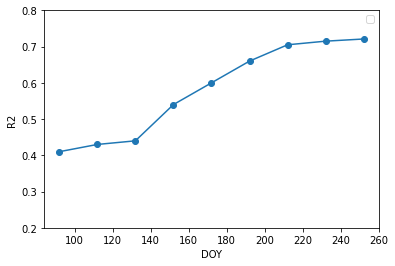

In [ ]:
# create data
R2_BNN = [0.41, 0.43, 0.44, 0.54, 0.60, 0.66,0.705, 0.715, 0.721]
DOY = list(range(92, 272, 20))

# plot lines
plt.scatter(DOY, R2_BNN)
plt.plot(DOY, R2_BNN , label = "")

plt.legend()
plt.xlabel('DOY')
plt.ylim(0.2, 0.8)
plt.ylabel('R2')
plt.show()

# Compare performance of different model

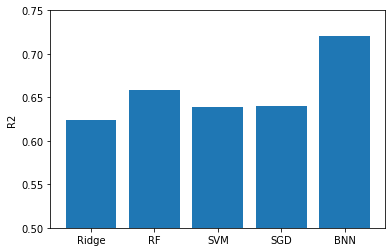

In [ ]:
height = [0.624, 0.658, 0.639, 0.640, 0.721]
bars = ('Ridge','RF', 'SVM', 'SGD', 'BNN')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.ylim(0.5, 0.75)
plt.ylabel('R2')

# Show graphic
plt.show()

# Feature Importance 

In [ ]:
plt.bar(x = )